In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Load data

In [2]:
Dict = dict(np.load('./Data/Fig_3_data.npy', allow_pickle=True).item())

### Density matrices

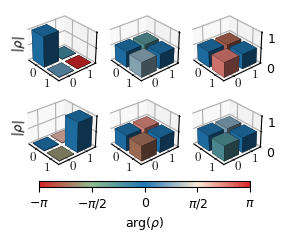

In [3]:
def _plot_density_matrix(rho, f, ax, rho_ideal=None, state=None, cbar=True,
                         zlabel=False, zticks=False):
    ax.set_xticks([-.1, .9])
    ax.set_yticks([-.1, .9])
    ax.set_xticklabels(['$0$', '$1$'], rotation=0, fontsize=9, usetex=True)
    ax.set_yticklabels(['$0$', '$1$'], rotation=0, fontsize=9, usetex=True)  
    ax.tick_params(axis='x', which='major', pad=-6)
    ax.tick_params(axis='y', which='major', pad=-7)
    ax.tick_params(axis='z', which='major', pad=-4)
    for tick in ax.yaxis.get_majorticklabels():
        tick.set_horizontalalignment("left")
    ax.set_zticks(np.linspace(0, 1, 3))
    if zticks:
        ax.set_zticklabels(['0', '', '1'], fontsize=9)
    else:
        ax.set_zticklabels(['', '', ''], fontsize=9)
    ax.set_zlim(0, 1)
    xedges = np.arange(-.75, 2, 1)
    yedges = np.arange(-.75, 2, 1)
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = dy = .8
    dz = np.abs(rho).ravel()
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["C3",'darkseagreen',"C0",
                                                                    'antiquewhite',"C3"])
    norm = matplotlib.colors.Normalize(vmin=-np.pi, vmax=np.pi)
    color=cmap(norm([np.angle(e) for e in rho.ravel()]))
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='max',
             color=color, alpha=1 , edgecolor='black', linewidth=.1)
    if zlabel:
        ax.set_zlabel(r'$|\rho|$', fontsize=9, labelpad=-53)


fig = plt.figure(figsize=(5,5), dpi=100)
gs = fig.add_gridspec(4, 4)
axs = []

# Density matrices
axs.append(fig.add_subplot(gs[0, 0], projection='3d', elev=30, azim=-40))
axs.append(fig.add_subplot(gs[0, 1], projection='3d', elev=30, azim=-40))
axs.append(fig.add_subplot(gs[0, 2], projection='3d', elev=30, azim=-40))
axs.append(fig.add_subplot(gs[1, 0], projection='3d', elev=30, azim=-40))
axs.append(fig.add_subplot(gs[1, 1], projection='3d', elev=30, azim=-40))
axs.append(fig.add_subplot(gs[1, 2], projection='3d', elev=30, azim=-40))
for i, state in enumerate(['0', '+', '+i', '1', '-', '-i']):
    _plot_density_matrix(Dict['Density_matrices'][state],
                         fig, axs[i], rho_ideal=None,
                         state=None, cbar=False, zlabel=True if state in ['0','1'] else False,
                         zticks=True if state in ['+i','-i'] else False)
# colorbar
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["C3",'darkseagreen',"C0",
                                                                    'antiquewhite',"C3"])
norm = matplotlib.colors.Normalize(vmin=-np.pi, vmax=np.pi)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cb = fig.colorbar(sm, orientation='horizontal', aspect=35, location='bottom')
cb.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cb.set_ticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
cb.set_label(r'$\arg(\rho)$', fontsize=9, labelpad=+3)
cb.ax.tick_params(labelsize=9)
# Fix axes position
for i in range(6):
    _pos = axs[i].get_position() # get the original position 
    _pos = [0.10217391304347828+i%3*0.165-.02, 
            +.08+0.7158695652173913-i//3*0.19695652173913047*.85,
            0.15 , 0.15 ] 
    axs[i].set_position(_pos)
    axs[i].patch.set_visible(False)
# Fix colorbar position
_pos = fig.axes[-1].get_position() # get the original position 
_pos = [_pos.x0-.415, _pos.y0+.06, _pos.width*2.5 , _pos.height ] 
fig.axes[-1].set_position(_pos)

### Phase versus pulse duration plot

Text(0, 0.5, 'Rotation angle (deg)')

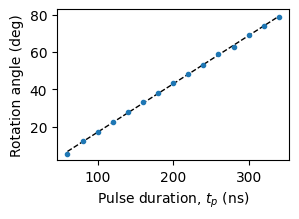

In [4]:
Duration = Dict['Duration']
Phase = Dict['Phase']
_poly_coefs, cov = np.polyfit(Duration, Phase, deg=1, cov=True)
_p = np.poly1d(_poly_coefs)

fig, ax = plt.subplots(figsize=(3,2), dpi=100)
ax.plot(Duration, _p(Duration), 'k--', lw=1, label='data')
ax.plot(Duration, Phase, 'C0.', label='fit')
ax.set_xlabel('Pulse duration, $t_p$ (ns)')
ax.set_ylabel('Rotation angle (deg)')

### PTMs

Text(0.5, 1.0, 'PTM after correction')

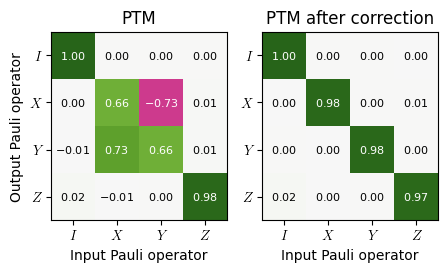

In [9]:
PTM = Dict['PTM'][::-1]
PTM_corrected = Dict['PTM_corrected'][::-1]

fig, axs = plt.subplots(figsize=(5,2.5), ncols=2, dpi=100)

# PTM
im = axs[0].pcolormesh(PTM, cmap=plt.cm.PiYG, vmin=-1, vmax=1)
axs[0].set_xticks(np.arange(4)+.5)
axs[0].set_yticks(np.arange(4)+.5)
axs[0].set_xticklabels([ '$I$', '$X$', '$Y$', '$Z$'], usetex=True)
axs[0].set_yticklabels([ '$I$', '$X$', '$Y$', '$Z$'][::-1], usetex=True)
for i in range(4):
    for j in range(4):
        c = PTM[j,i]
        c = round(c*1e2)/1e2
        if abs(c) > .5:
            axs[0].text(i+.5, j+.5, '${:.2f}$'.format(c), va='center', ha='center',
                         color = 'white', size=8)
        else:
            axs[0].text(i+.5, j+.5, '${:.2f}$'.format(c), va='center', ha='center',
                        size=8)
axs[0].set_xlabel('Input Pauli operator')
axs[0].set_ylabel('Output Pauli operator')
axs[0].set_title('PTM')

# corrected PTM
im = axs[1].pcolormesh(PTM_corrected, cmap=plt.cm.PiYG, vmin=-1, vmax=1)
axs[1].set_xticks(np.arange(4)+.5)
axs[1].set_yticks(np.arange(4)+.5)
axs[1].set_xticklabels([ '$I$', '$X$', '$Y$', '$Z$'], usetex=True)
axs[1].set_yticklabels([ '$I$', '$X$', '$Y$', '$Z$'][::-1], usetex=True)
for i in range(4):
    for j in range(4):
        c = PTM_corrected[j,i]
        c = round(c*1e2)/1e2
        if abs(c) > .5:
            axs[1].text(i+.5, j+.5, '${:.2f}$'.format(c), va='center', ha='center',
                         color = 'white', size=8)
        else:
            axs[1].text(i+.5, j+.5, '${:.2f}$'.format(c), va='center', ha='center',
                        size=8)
axs[1].set_xlabel('Input Pauli operator')
axs[1].set_title('PTM after correction')